In [1]:
"""
Programmed by Ardavan Modarres
ardavan.modarres@email.kntu.ac.ir
* 2022-05-31: Initial coding
"""

'\nProgrammed by Ardavan Modarres\nardavan.modarres@email.kntu.ac.ir\n* 2022-05-31: Initial coding\n'

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

# import torch
# import torchvision 
# import torch.nn.functional as F  
import torchvision.datasets as datasets  
# import torchvision.transforms as transforms  
# from torch import optim  
# from torch import nn  
# from torch.utils.data import DataLoader 

In [3]:
train_dataset = datasets.FashionMNIST(root="dataset/", train=True, download=True)
test_dataset = datasets.FashionMNIST(root="dataset/", train=False, download=True)

labels = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

train_data = np.zeros((1000, 784))
train_labels = np.zeros((1000, 1))
test_data = np.zeros((3000, 784))
test_labels = np.zeros((3000, 1))

for i in range(train_data.shape[0]):
    train_data[i, :] = np.array(train_dataset[i][0]).reshape((-1, ))/255.
    train_labels[i, 0] = train_dataset[i][1]

for i in range(test_data.shape[0]):
    test_data[i, :] = np.array(test_dataset[i][0]).reshape((-1, ))/255.
    test_labels[i, 0] = test_dataset[i][1]

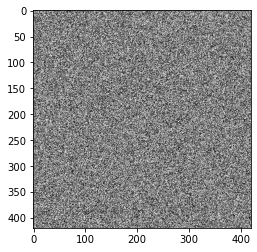

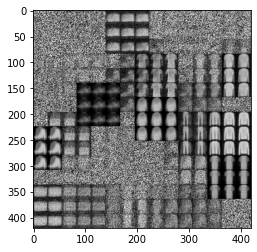

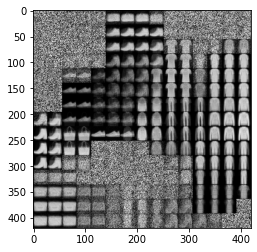

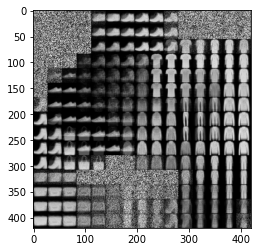

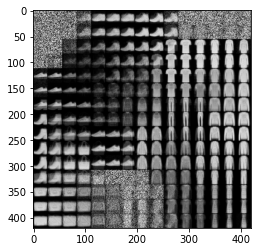

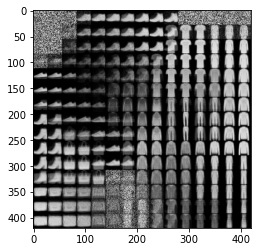

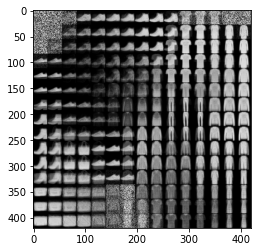

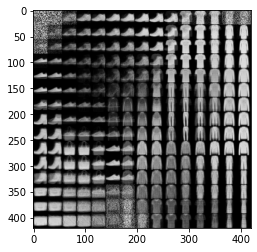

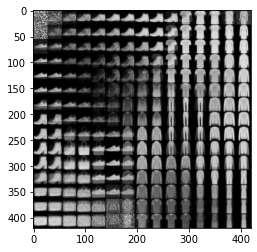

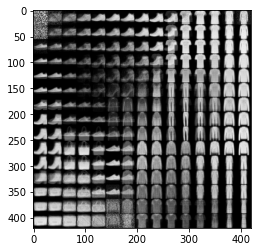

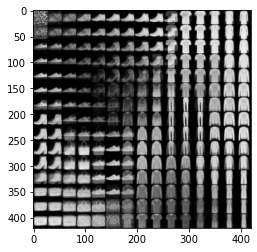

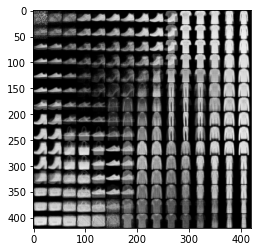

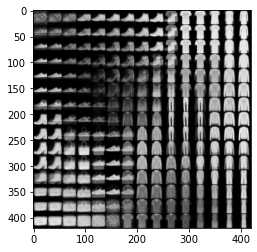

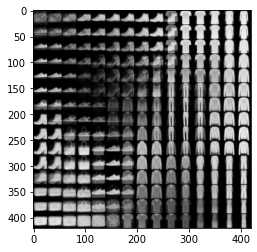

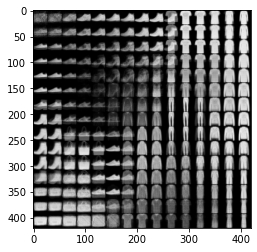

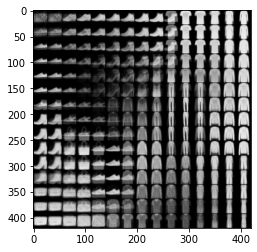

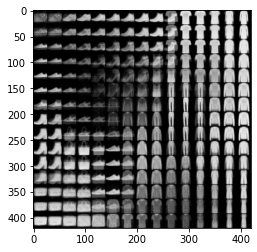

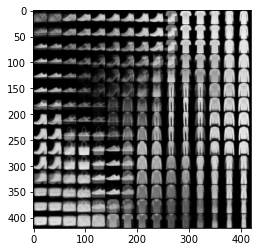

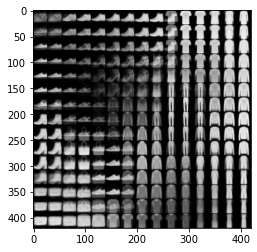

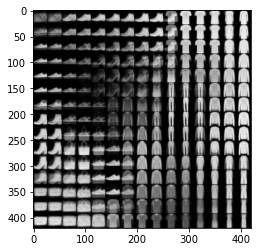

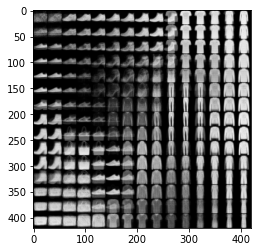

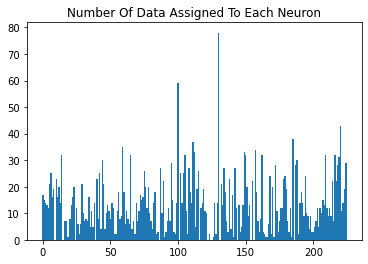

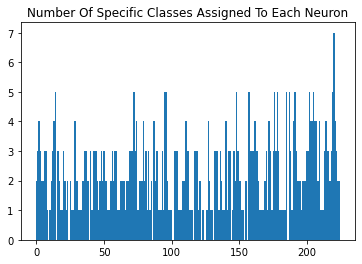

Number Of Pure Neurons =  61


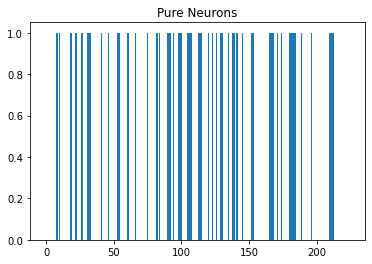

In [4]:
class SOM:
    def __init__(self, num_neurons: int, feature_dimension: int, topology: str ='square') -> None:
        self.num_neurons = num_neurons                     # must be n*n or a complete square number in square topology   
        self.neurons_unit = int(math.sqrt(num_neurons))
        self.feature_dimension = feature_dimension
        self.w = np.random.rand(self.num_neurons, self.feature_dimension)
        self.topology = topology
        self.neighborhoods = ((0,), (-1, 0, 1), (-2, -1, 0, 1, 2), (-3, -2, -1, 0, 1, 2, 3))
        self.lr = 0.1
        self.lr_decay = 0.95


    def orderly_pair2number(self, orderly_pair):
        number = self.neurons_unit*orderly_pair[0]+orderly_pair[1]
        return number

    def number2orderly_pair(self, number):
        orderly_pair = (number//self.neurons_unit, number%self.neurons_unit)
        return orderly_pair

    def compute_distance(self, data):
        w_squared = np.sum(self.w**2, axis=1, keepdims=True)
        data_squared = np.sum(data**2, axis=1, keepdims=True)
        w_times_data = np.dot(data, self.w.T)

        return np.sqrt(data_squared-2*w_times_data+w_squared.T)

    def find_neighbors(self, orderly_pair, neighberhood):
        neighbors = []
        for i in neighberhood:
            for j in neighberhood:
                x = orderly_pair[0]+i
                y = orderly_pair[1]+j
                validity = self.validation_check(x, y)
                if validity:
                    neighbors.append((x, y))
        return neighbors

    def validation_check(self, x, y):
        if 0<=x<=14 and 0<=y<=14:
            return True
        else:
            return False

    def update(self, data, distance, neighberhood_pointer):
        winner_neurons = np.argmin(distance, axis=1)
        for i, d in enumerate(winner_neurons):
            pair = self.number2orderly_pair(d)
            neighbors = self.find_neighbors(pair, self.neighborhoods[neighberhood_pointer])
            for neighbor in neighbors:
                neighbor_number = self.orderly_pair2number(neighbor)
                self.w[neighbor_number, :]+=self.lr*(data[i, :] - self.w[neighbor_number, :])

    def train(self, data, num_epochs):
        for i in range(num_epochs):
            if i == 0:
                self.visualize_neurons()
            distance = self.compute_distance(data)
            self.update(data, distance, 1)
            self.visualize_neurons()
            self.lr = max(0.01, self.lr_decay*self.lr)
            
    def test(self, x_test, y_test):
        assignment = {i:[] for i in range(self.num_neurons)}
        distance = self.compute_distance(x_test)
        closest_neurons = np.argmin(distance, axis=1)
        for idx, n in enumerate(closest_neurons):
            assignment[n].append(y_test[idx].item())
        return assignment
                
    def visualize_neurons(self):
        neural_image = np.random.rand(420, 420)
        for i in range(225):
            p0, p1 = self.number2orderly_pair(i)
            neural_image[28*p0:28*(p0+1), 28*p1:28*(p1+1)] = self.w[i].reshape((28, 28))

        plt.imshow(neural_image, cmap='gray')
        plt.show()

    def visualize_histograms(self, x_test, y_test):
        neurons_index = []
        num_all_data_assigned = []
        num_specific_classes_assigned = []
        assignment_reslut = self.test(x_test, y_test)
        for i in assignment_reslut.keys():
            neurons_index.append(i)
            num_all_data_assigned.append(len(assignment_reslut[i]))
            num_specific_classes_assigned.append(len(set(assignment_reslut[i])))
        
        plt.bar(neurons_index, num_all_data_assigned, width = 1)
        plt.title('Number Of Data Assigned To Each Neuron')
        plt.show()
        
        plt.bar(neurons_index, num_specific_classes_assigned, width = 1)
        plt.title('Number Of Specific Classes Assigned To Each Neuron')
        plt.show()
        
        pure_neurons_idx = np.where(np.array(num_specific_classes_assigned)==1)[0]
        pure_neurons = np.zeros(self.num_neurons)
        pure_neurons[pure_neurons_idx] = 1
        print("Number Of Pure Neurons = ", pure_neurons_idx.size)
        plt.bar(neurons_index, pure_neurons, width = 1)
        plt.title('Pure Neurons')
        plt.show()
        
# test the class SOM
som = SOM(15*15, 784,)
som.train(train_data, 20)
som.visualize_histograms(test_data, test_labels)


### variable Neighborhood Radius

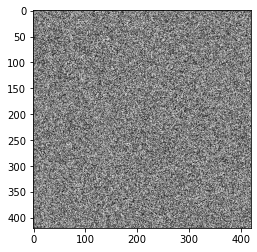

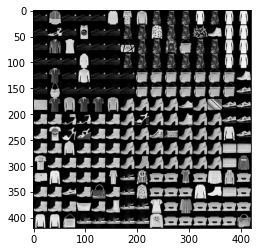

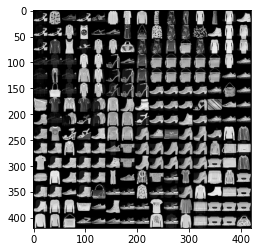

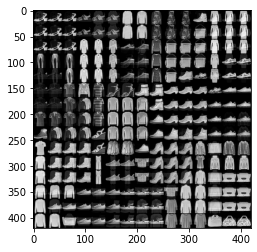

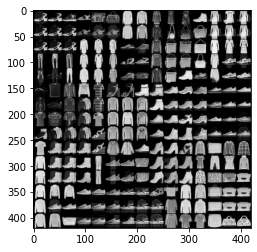

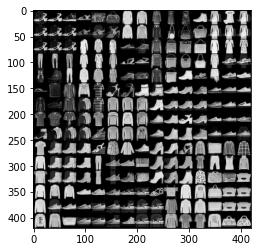

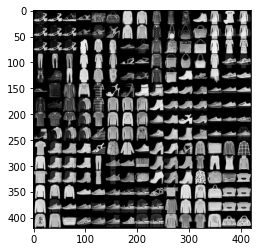

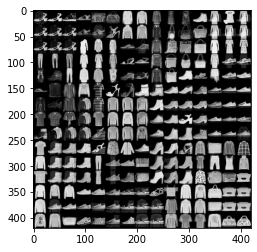

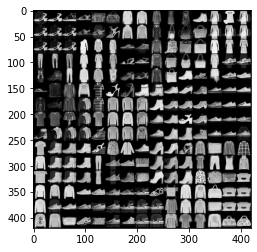

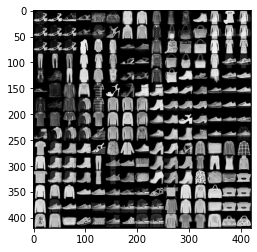

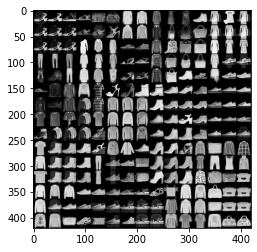

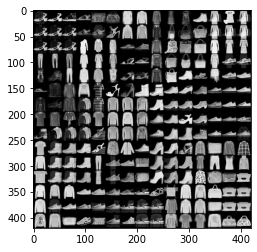

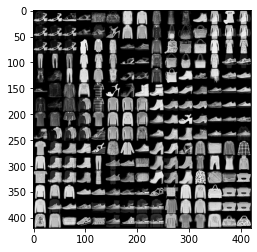

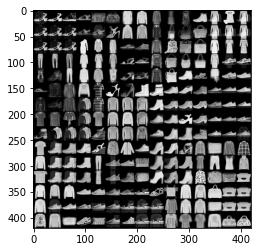

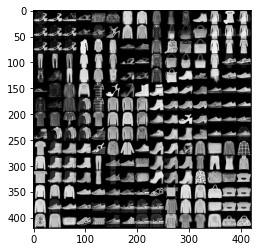

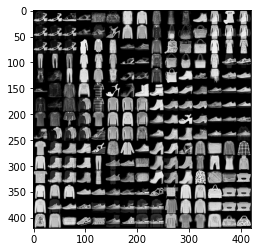

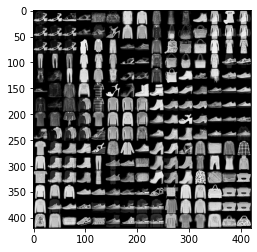

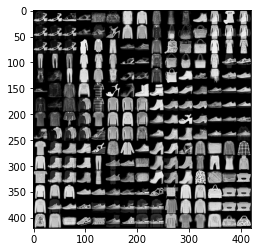

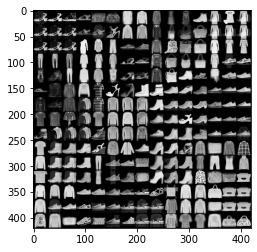

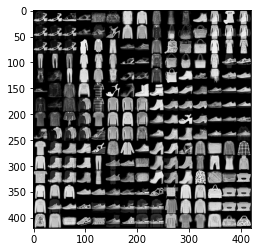

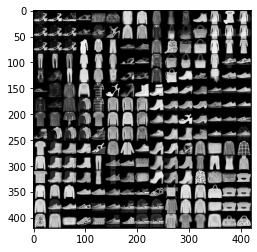

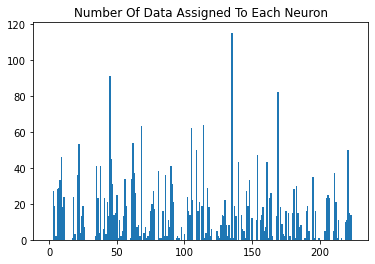

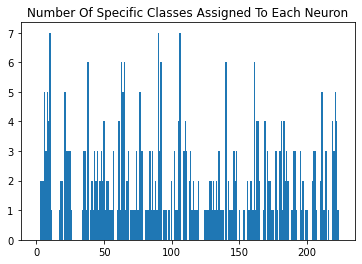

Number Of Pure Neurons =  70


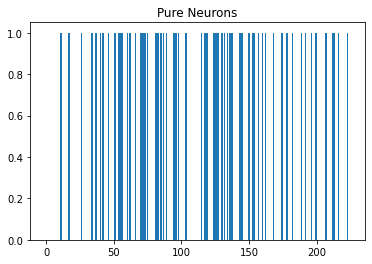

In [5]:
class SOM:
    def __init__(self, num_neurons: int, feature_dimension: int, topology: str ='square') -> None:
        self.num_neurons = num_neurons                     # must be n*n or a complete square number in square topology   
        self.neurons_unit = int(math.sqrt(num_neurons))
        self.feature_dimension = feature_dimension
        self.w = np.random.rand(self.num_neurons, self.feature_dimension)
        self.topology = topology
        self.neighborhoods = ((0,), (-1, 0, 1), (-2, -1, 0, 1, 2), (-3, -2, -1, 0, 1, 2, 3))
        self.lr = 0.95
        self.lr_decay = 0.9


    def orderly_pair2number(self, orderly_pair):
        number = self.neurons_unit*orderly_pair[0]+orderly_pair[1]
        return number

    def number2orderly_pair(self, number):
        orderly_pair = (number//self.neurons_unit, number%self.neurons_unit)
        return orderly_pair

    def compute_distance(self, data):
        w_squared = np.sum(self.w**2, axis=1, keepdims=True)
        data_squared = np.sum(data**2, axis=1, keepdims=True)
        w_times_data = np.dot(data, self.w.T)

        return np.sqrt(data_squared-2*w_times_data+w_squared.T)

    def find_neighbors(self, orderly_pair, neighberhood):
        neighbors = []
        for i in neighberhood:
            for j in neighberhood:
                x = orderly_pair[0]+i
                y = orderly_pair[1]+j
                validity = self.validation_check(x, y)
                if validity:
                    neighbors.append((x, y))
        return neighbors

    def validation_check(self, x, y):
        if 0<=x<=14 and 0<=y<=14:
            return True
        else:
            return False

    def update(self, data, distance, neighberhood_pointer):
        winner_neurons = np.argmin(distance, axis=1)
        for i, d in enumerate(winner_neurons):
            pair = self.number2orderly_pair(d)
            neighbors = self.find_neighbors(pair, self.neighborhoods[neighberhood_pointer])
            for neighbor in neighbors:
                neighbor_number = self.orderly_pair2number(neighbor)
                self.w[neighbor_number, :]+=self.lr*(data[i, :] - self.w[neighbor_number, :])

    def train(self, data, num_epochs):
        for i in range(num_epochs):
            if i == 0:
                self.visualize_neurons()
            distance = self.compute_distance(data)
            if i == 0:
                self.update(data, distance, 3)
            if i == 1:
                self.update(data, distance, 2)
            if i == 2:
                self.update(data, distance, 1)
            else:
                self.update(data, distance, 0)
            self.visualize_neurons()
            self.lr = max(0.01, self.lr_decay*self.lr)
            
    def test(self, x_test, y_test):
        assignment = {i:[] for i in range(self.num_neurons)}
        distance = self.compute_distance(x_test)
        closest_neurons = np.argmin(distance, axis=1)
        for idx, n in enumerate(closest_neurons):
            assignment[n].append(y_test[idx].item())
        return assignment
                
    def visualize_neurons(self):
        neural_image = np.random.rand(420, 420)
        for i in range(225):
            p0, p1 = self.number2orderly_pair(i)
            neural_image[28*p0:28*(p0+1), 28*p1:28*(p1+1)] = self.w[i].reshape((28, 28))

        plt.imshow(neural_image, cmap='gray')
        plt.show()

    def visualize_histograms(self, x_test, y_test):
        neurons_index = []
        num_all_data_assigned = []
        num_specific_classes_assigned = []
        assignment_reslut = self.test(x_test, y_test)
        for i in assignment_reslut.keys():
            neurons_index.append(i)
            num_all_data_assigned.append(len(assignment_reslut[i]))
            num_specific_classes_assigned.append(len(set(assignment_reslut[i])))
        
        plt.bar(neurons_index, num_all_data_assigned, width = 1)
        plt.title('Number Of Data Assigned To Each Neuron')
        plt.show()
        
        plt.bar(neurons_index, num_specific_classes_assigned, width = 1)
        plt.title('Number Of Specific Classes Assigned To Each Neuron')
        plt.show()
        
        pure_neurons_idx = np.where(np.array(num_specific_classes_assigned)==1)[0]
        pure_neurons = np.zeros(self.num_neurons)
        pure_neurons[pure_neurons_idx] = 1
        print("Number Of Pure Neurons = ", pure_neurons_idx.size)
        plt.bar(neurons_index, pure_neurons, width = 1)
        plt.title('Pure Neurons')
        plt.show()
        
        

# test the class SOM
som = SOM(15*15, 784,)
som.train(train_data, 20)
som.visualize_histograms(test_data, test_labels)